In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0.5, 1.0, 'House Prices')

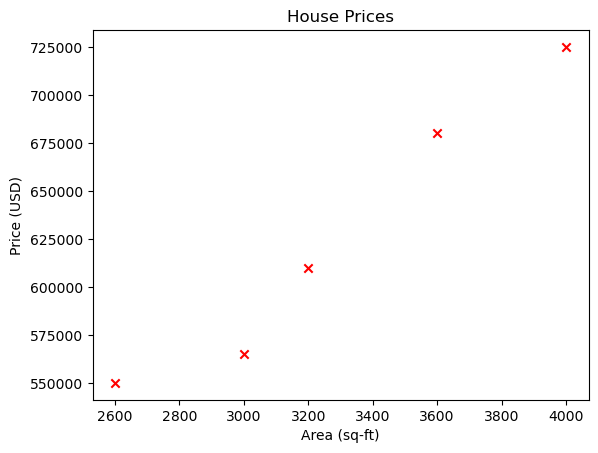

In [3]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red',marker ='x')
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.title("House Prices")

In [4]:
df.area.values.reshape(-1,1)

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df.area.values.reshape(-1,1),df.price.values)

LinearRegression()

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [8]:
reg.coef_ # weight

array([135.78767123])

In [9]:
reg.intercept_ # bias

180616.43835616432

In [10]:
print(reg.predict([[3300]]))
print((reg.coef_)*(3300) + reg.intercept_)  # y = wx + b

[628715.75342466]
[628715.75342466]


In [11]:
test = pd.read_csv('areas.csv')

In [16]:
test.values # so no need to use .reshape(-1,1)

array([[1000],
       [1500],
       [2300],
       [3540],
       [4120],
       [4560],
       [5490],
       [3460],
       [4750],
       [2300],
       [9000],
       [8600],
       [7100]], dtype=int64)

In [17]:
predict = reg.predict(test)

C:\Users\US593\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
predict

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [19]:
test['predicted prices'] = predict

In [20]:
test

,area,predicted prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [21]:
test.to_csv('predicted.csv')

In [22]:
predict1 = pd.DataFrame(predict,columns= ['prices'])

In [23]:
predict1

,prices
0,3.164041e+05
1,3.842979e+05
2,4.929281e+05
3,6.613048e+05
4,7.400616e+05
5,7.998082e+05
6,9.260908e+05
7,6.504418e+05
8,8.256079e+05
9,4.929281e+05


In [24]:
predict1.to_csv('predict.csv')

Text(0.5, 1.0, 'House Prices')

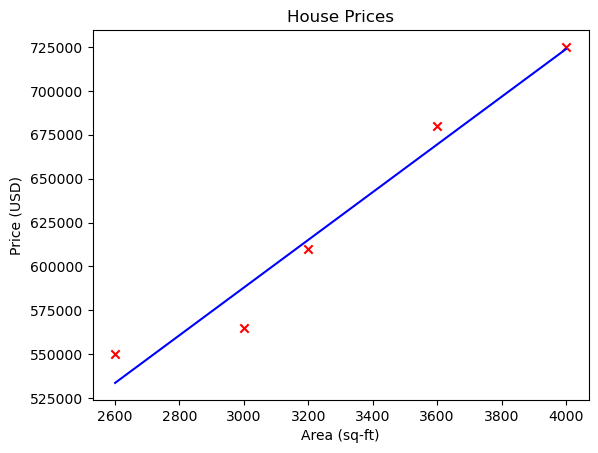

In [26]:
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red',marker ='x')
plt.plot(df.area,reg.predict(df.area.values.reshape(-1,1)),color = 'blue')
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.title("House Prices")

In [32]:
# so some important concepts which were troubling you

In [33]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [34]:
df.area.values

array([2600, 3000, 3200, 3600, 4000], dtype=int64)

In [35]:
df.area.values.reshape(-1,1)

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

# Exercise

In [36]:
data = pd.read_csv('canada_per_capita_income.csv')

In [38]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [39]:
reg1 = linear_model.LinearRegression()

In [40]:
reg1.fit(data.year.values.reshape(-1,1),data['per capita income (US$)'])

LinearRegression()

In [41]:
p = reg1.predict(data.year.values.reshape(-1,1))

In [42]:
data['predicted_per_capita_income (US$)'] = p

In [43]:
data.head()

,year,per capita income (US$),predicted_per_capita_income (US$)
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634


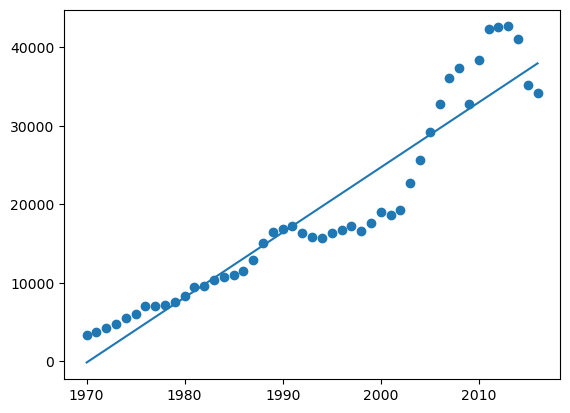

In [45]:
%matplotlib inline
plt.scatter(data.year,data['per capita income (US$)'])
plt.plot(data.year,data['predicted_per_capita_income (US$)'])